In [1]:
from factor_analysis_adv import *

#算法辅助&数据
import sklearn
from sklearn.model_selection import KFold,cross_validate   #交叉验证
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split     #训练集测试集拆分

#算法（学习器）                          
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

### 1 数据导入

In [2]:
# 基准指数
index_item = '000300.XSHG'
# 机器学习数据
data = pd.read_pickle('./data/ml_data.pkl')
# 研究周期
date_list = sorted(set(data.index.get_level_values(0)))                                    # 研究周期确定
# 特征集
x = data.loc[:,:'AMP20']                                                                   # 去除文本数据，保留因子数据
# 目标集合
y = data.loc[:,'target']                                                                   # Y对象为binary数据1，0
# 样本分离
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)         # 拆分训练集和测试集
# 特征名称
features = x_train.columns.tolist()                                                        # 建立特征集

In [3]:
print(features)

['liq_turn_avg', 'liq_turn_std', 'liq_zamount', 'corr_price_turn', 'corr_ret_turn', 'vol_highlow_std', 'candle_shadow', 'mmt_normal_A', 'MCST', 'CYF', 'ATR', 'MADKX', 'MAUDL', 'AMP20']


In [4]:
data

liq_turn_avg  liq_turn_std  liq_zamount  \
date       order_book_id                                            
2020-01-02 000001.XSHE        0.235861      0.149005     0.185001   
           000002.XSHE        1.140667      1.378555    -0.630646   
           000063.XSHE        1.108162      1.205451     0.216901   
           000069.XSHE       -0.157295      0.098209    -0.758848   
           000100.XSHE        0.517089      0.822622    -1.868106   
...                                ...           ...          ...   
2024-04-01 688363.XSHG       -0.300403     -0.596757     0.592271   
           688396.XSHG       -2.205416     -2.071362     1.461129   
           688561.XSHG       -1.945036     -2.159213     1.710594   
           688599.XSHG       -1.027428     -0.624878    -0.775560   
           688981.XSHG        0.022682     -0.755532     1.413704   

                          corr_price_turn  corr_ret_turn  vol_highlow_std  \
date       order_book_id                                                    
2020-01-02 000001.XSHE          -0.179950       1.067435         0.767360   
           000002.XSHE          -1.345616      -1.132483         2.130335   
           000063.XSHE           0.776831       0.444789         0.307602   
           000069.XSHE          -0.273656      -0.493959        -0.241554   
           000100.XSHE           0.256657       0.914881         0.083669   
...                                   ...            ...              ...   
2024-04-01 688363.XSHG           1.032394      -0.209054        -0.541943   
           688396.XSHG          -1.384841      -1.235223        -1.810791   
           688561.XSHG          -0.669057      -1.044599        -0.536166   
           688599.XSHG          -0.115767      -0.194159         1.358823   
           688981.XSHG           0.513325      -0.423775        -1.460025   

                          candle_shadow  mmt_normal_A      MCST       CYF  \
date       order_book_id                                                    
2020-01-02 000001.XSHE         0.189099      1.630257  0.379035  0.220262   
           000002.XSHE         0.710111     -0.899662  0.443806  0.976252   
           000063.XSHE        -0.366186      1.249383  1.057896  1.272605   
           000069.XSHE        -0.613905     -0.195490 -0.740743 -0.134856   
           000100.XSHE         0.042600     -0.472926  1.579189  0.593559   
...                                 ...           ...       ...       ...   
2024-04-01 688363.XSHG        -0.730393     -0.965612  1.304050 -0.259034   
           688396.XSHG         0.066354     -0.567657  0.279431 -2.218073   
           688561.XSHG        -0.797238     -0.916671  0.317323 -1.921370   
           688599.XSHG        -1.048776     -1.012424 -0.032858 -1.156408   
           688981.XSHG        -0.952175     -0.691670  0.008602  0.151359   

                               ATR     MADKX     MAUDL     AMP20    ret_5d  \
date       order_book_id                                                     
2020-01-02 000001.XSHE    0.452849  0.464853  0.474638  0.940617 -0.008856   
           000002.XSHE    0.614641  0.850202  0.906591  1.514249 -0.021706   
           000063.XSHE    1.197023  1.019584  1.042019  0.791573  0.015265   
           000069.XSHE   -0.868731 -0.848948 -0.846255 -0.209022 -0.001278   
           000100.XSHE   -2.393650 -2.213715 -2.187245  0.668535  0.041394   
...                            ...       ...       ...       ...       ...   
2024-04-01 688363.XSHG    1.585730  1.431937  1.383895  0.010347       NaN   
           688396.XSHG   -0.397263  0.066566  0.065475 -1.315384       NaN   
           688561.XSHG   -0.186559 -0.148906 -0.159137 -0.362989       NaN   
           688599.XSHG   -0.037175 -0.192738 -0.216944 -0.121995       NaN   
           688981.XSHG   -0.081917  0.072860  0.047985 -0.617955       NaN   

                          excess_ret_5d  current_ret  target  
date       order_book_id                      

In [5]:
x_train

,,liq_turn_avg,liq_turn_std,liq_zamount,corr_price_turn,corr_ret_turn,vol_highlow_std,candle_shadow,mmt_normal_A,MCST,CYF,ATR,MADKX,MAUDL,AMP20
date,order_book_id,,,,,,,,,,,,,,
2022-03-02,603993.XSHG,-1.389468,-0.883306,-0.945344,-0.091805,-0.135166,-0.691949,-0.187382,-1.380179,-1.778306,-1.335922,-1.595457,-1.608094,-1.618203,-0.789363
2020-08-05,601390.XSHG,-0.221629,-0.411659,0.242326,0.353843,0.817781,-0.183012,-0.099325,-0.330532,-0.054342,-0.129463,-0.347253,-0.336944,-0.338632,-0.277036
2020-11-09,600233.XSHG,0.414942,-0.265712,1.666635,-1.046188,-0.914937,-1.147957,-0.320164,0.691104,-0.022415,0.318111,0.125787,0.146654,0.117113,0.607648
2022-03-15,600763.XSHG,1.525375,1.440732,-0.297422,0.123717,-0.810972,1.000790,0.166389,-0.615358,1.164244,1.300743,1.418446,1.483704,1.463461,1.204228
2023-06-29,000983.XSHE,0.320109,-0.349413,1.028752,1.174316,1.412461,-0.572411,-0.781479,-0.115240,-0.185415,0.386664,-0.267598,-0.279575,-0.271849,0.144369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,002602.XSHE,1.542657,1.635043,-1.524965,2.117353,2.225269,1.615590,1.017754,-1.667412,-1.748846,1.457432,-0.913024,-1.066303,-1.011944,1.197998
2021-09-15,002415.XSHE,-1.366233,-1.099582,-0.451926,-1.870082,0.074629,-0.723943,1.369226,0.863215,-0.054008,-1.408472,-0.468046,-0.182530,-0.216062,-1.001940
2024-03-26,600754.XSHG,0.954043,1.113146,-0.902536,0.401661,1.694380,1.103517,0.238117,0.214714,-0.532712,0.864410,-0.507086,-0.840446,-0.801865,0.928082


In [6]:
y_train

date        order_book_id
2022-03-02  603993.XSHG      False
2020-08-05  601390.XSHG       True
2020-11-09  600233.XSHG      False
2022-03-15  600763.XSHG      False
2023-06-29  000983.XSHE      False
                             ...  
2021-03-22  002602.XSHE      False
2021-09-15  002415.XSHE      False
2024-03-26  600754.XSHG      False
2022-02-21  002371.XSHE       True
2021-08-24  601229.XSHG      False
Name: target, Length: 244372, dtype: bool

### 2 决策树

In [8]:
clf = DecisionTreeClassifier(criterion = 'gini',
                             class_weight = 'balanced',
                             max_depth = 6,
                             random_state = 0,
                             )

clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=0)

In [9]:
#特征提取
def feature_importances(clf):
    features_important=clf.feature_importances_             
    features_important_df = pd.DataFrame([features,features_important],index=['feature','feature_importance']).T  #建立特征值表   
    features_important_df = features_important_df.sort_values(by = 'feature_importance') 

    #画图
    ind = np.arange(len(features_important_df['feature']))    
    width = 0.35 
    ax = plt.figure(figsize=(len(features_important_df['feature'])/3,len(features_important_df['feature'])/2))
    plt.barh(ind, features_important_df['feature_importance'], width , color='IndianRed', label='Feature_importance')

    plt.yticks(ind,([feature for feature in features_important_df['feature']]))
    plt.tick_params(labelsize=8)
    plt.show()

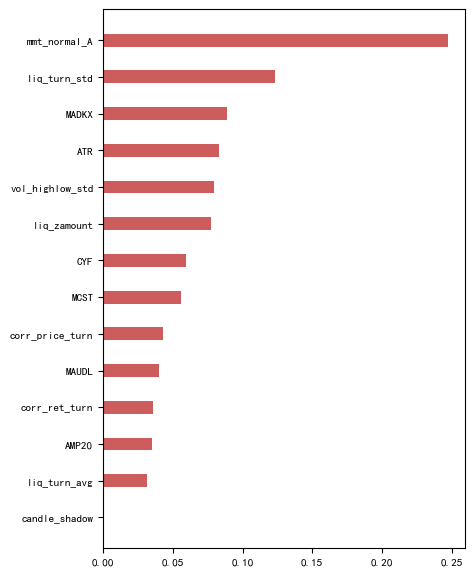

In [10]:
feature_importances(clf)

In [11]:
ic_summary_5 = pd.read_csv('./data/report/ic_summary_5.csv',index_col=[0]).sort_values(by = 'IR')
ic_summary_5

,IC mean,IC std,IR,IC>0,ABS_IC>2%,t_stat
name,,,,,,
liq_turn_std,-0.0295,0.0963,-0.3059,0.3783,0.8690,-9.7850
CYF,-0.0320,0.1105,-0.2899,0.3930,0.8671,-9.2738
liq_turn_avg,-0.0312,0.1096,-0.2849,0.3851,0.8719,-9.1121
vol_highlow_std,-0.0231,0.1108,-0.2083,0.4252,0.8622,-6.6638
MCST,-0.0185,0.1137,-0.1631,0.4506,0.8700,-5.2152
AMP20,-0.0184,0.1142,-0.1613,0.4457,0.8719,-5.1598
ATR,-0.0222,0.1466,-0.1512,0.4448,0.9032,-4.8345
candle_shadow,-0.0131,0.0874,-0.1500,0.4272,0.8299,-4.7961
MAUDL,-0.0177,0.1333,-0.1328,0.4555,0.8983,-4.2479


In [12]:
def evaluation(clf,x_train,y_train,x_test,y_test):
    """
    对融合模型做交叉验证，对融合模型表现进行评估
    """
    cv = KFold(n_splits = 5,shuffle = True,random_state = 666)                  #5折交叉验证
    result = cross_validate(clf,
                            x_train,
                            y_train,
                            cv = cv,
                            scoring = 'precision',
                            n_jobs = -1,
                            return_train_score = True,
                            verbose = False
                            )
    # 训练集CV
    train_signal = confusion_matrix(list(y_train),list(clf.predict(x_train)))
    confusion_data_train = pd.DataFrame(train_signal,
                                        index=['real_zero','real_one'],
                                        columns=['predict_zero','predict_one'])
    
    print('\n ----------- train -----------')
    print('\n',confusion_data_train)
    print('\n train_cv_score: {}'.format(result['train_score'].mean()))
    # 测试集
    predict = clf.predict(x_test)                                                 
    print('\n ----------- test -----------')    
    print(classification_report(y_test,predict))

In [13]:
evaluation(clf,x_train,y_train,x_test,y_test)


 ----------- train -----------

            predict_zero  predict_one
real_zero         96166        41202
real_one          69915        37089

 train_cv_score: 0.46610982004722423

 ----------- test -----------
              precision    recall  f1-score   support

       False       0.58      0.69      0.63     34331
        True       0.47      0.34      0.39     26762

    accuracy                           0.54     61093
   macro avg       0.52      0.52      0.51     61093
weighted avg       0.53      0.54      0.53     61093



In [16]:
# 测试集合预测
x_test_copy = x_test.copy()
x_test_copy['predict'] = clf.predict(x_test_copy)

In [17]:
def get_siganl_delay(x_test,T = 5):
    # 时间获取
    start_date = x_test.index.get_level_values(0).min()
    end_date = x_test.index.get_level_values(0).max()
    date_list = pd.to_datetime(get_trading_dates(start_date,end_date))
    # 信号数字化
    predict_signal = x_test['predict'].astype(int)
    # 信号递延
    predict_signal = predict_signal.unstack().fillna(0).reindex(date_list).unstack()
    predict_signal_delay = pd.DataFrame({i:predict_signal.groupby(level=0).apply(lambda x:x.shift(i)) for i in range(1,T+1)}).sort_index()
    # 信号叠加
    predict_signal_delay['signal_level'] = predict_signal_delay.sum(axis = 1) 
    predict_signal_cum = predict_signal_delay.signal_level.unstack('order_book_id')
    # predict_signal_cum.stack().replace(0,np.nan).hist(bins = 5)
    # predict_signal_cum.stack().value_counts().sort_index()

    return predict_signal_cum,predict_signal_delay

In [18]:
predict_signal_cum,predict_signal_delay = get_siganl_delay(x_test_copy)

In [19]:
predict_signal_delay

1    2    3    4    5  signal_level
order_book_id                                                  
000001.XSHE   2020-01-02  NaN  NaN  NaN  NaN  NaN           0.0
              2020-01-03  0.0  NaN  NaN  NaN  NaN           0.0
              2020-01-06  0.0  0.0  NaN  NaN  NaN           0.0
              2020-01-07  0.0  0.0  0.0  NaN  NaN           0.0
              2020-01-08  0.0  0.0  0.0  0.0  NaN           0.0
...                       ...  ...  ...  ...  ...           ...
688981.XSHG   2024-03-26  0.0  0.0  0.0  0.0  0.0           0.0
              2024-03-27  0.0  0.0  0.0  0.0  0.0           0.0
              2024-03-28  0.0  0.0  0.0  0.0  0.0           0.0
              2024-03-29  0.0  0.0  0.0  0.0  0.0           0.0
              2024-04-01  0.0  0.0  0.0  0.0  0.0           0.0

[463050 rows x 6 columns]

0.0    379316
1.0     53622
2.0     23737
3.0      5679
4.0       669
5.0        27
dtype: int64

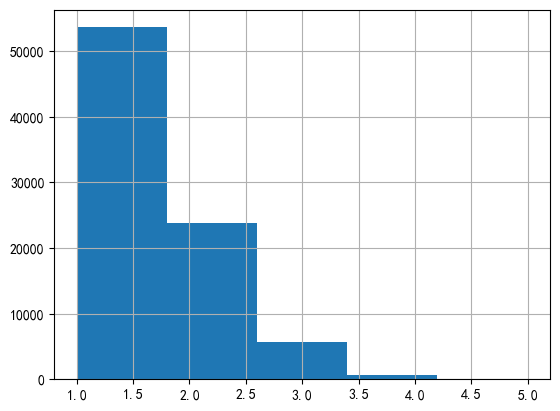

In [20]:
predict_signal_cum.stack().replace(0,np.nan).hist(bins = 5)
predict_signal_cum.stack().value_counts().sort_index()

100%|██████████| 206/206 [00:00<00:00, 278.69it/s]


{'策略累计收益': 0.2102,
 '策略年化收益': 0.0478,
 '基准累计收益': -0.1155,
 '基准年化收益': -0.0296,
 '阿尔法': 0.0725,
 '贝塔': 0.882,
 '波动率': 0.1859,
 '夏普比率': 0.0956,
 '下行波动率': 0.1415,
 '索提诺比率': 0.1257,
 '跟踪误差': 0.0602,
 '信息比率': 1.2857,
 '最大回撤': 0.2956,
 '卡玛比率': 0.1617,
 '超额累计收益': 0.3683,
 '超额年化收益': 0.0797,
 '超额波动率': 0.0612,
 '超额夏普': 0.8124,
 '超额最大回测': 0.0684,
 '胜率': 0.5364,
 '盈亏比': 1.071}

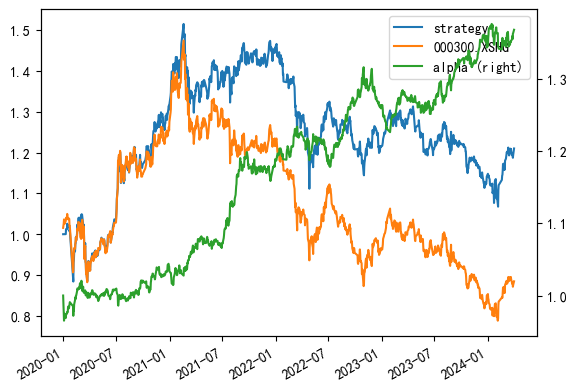

In [21]:
# 回测检验
buy_list = (predict_signal_cum != 0).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

#### 2.1 调整模型参数

##### 2.1.1 max_depth = 3

In [23]:
clf = DecisionTreeClassifier(criterion = 'gini',
                             class_weight = 'balanced',
                             max_depth = 3,
                             random_state = 0,
                             )

clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

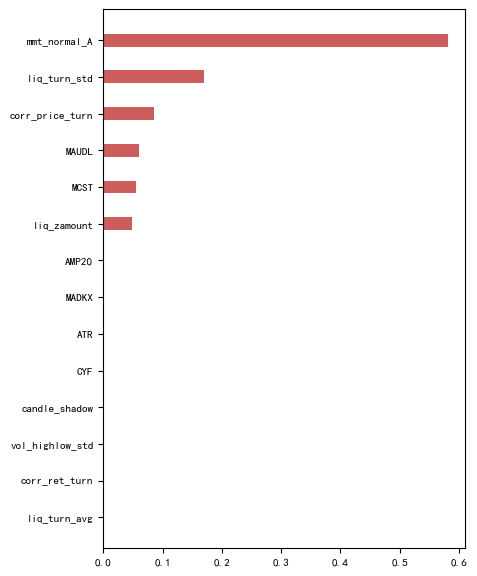

In [24]:
feature_importances(clf)

In [25]:
evaluation(clf,x_train,y_train,x_test,y_test)


 ----------- train -----------

            predict_zero  predict_one
real_zero         85181        52187
real_one          62212        44792

 train_cv_score: 0.4593990957095704

 ----------- test -----------
              precision    recall  f1-score   support

       False       0.57      0.62      0.59     34331
        True       0.46      0.41      0.43     26762

    accuracy                           0.53     61093
   macro avg       0.52      0.52      0.51     61093
weighted avg       0.52      0.53      0.52     61093



100%|██████████| 206/206 [00:00<00:00, 290.71it/s]


{'策略累计收益': 0.2102,
 '策略年化收益': 0.0478,
 '基准累计收益': -0.1155,
 '基准年化收益': -0.0296,
 '阿尔法': 0.0725,
 '贝塔': 0.882,
 '波动率': 0.1859,
 '夏普比率': 0.0956,
 '下行波动率': 0.1415,
 '索提诺比率': 0.1257,
 '跟踪误差': 0.0602,
 '信息比率': 1.2857,
 '最大回撤': 0.2956,
 '卡玛比率': 0.1617,
 '超额累计收益': 0.3683,
 '超额年化收益': 0.0797,
 '超额波动率': 0.0612,
 '超额夏普': 0.8124,
 '超额最大回测': 0.0684,
 '胜率': 0.5364,
 '盈亏比': 1.071}

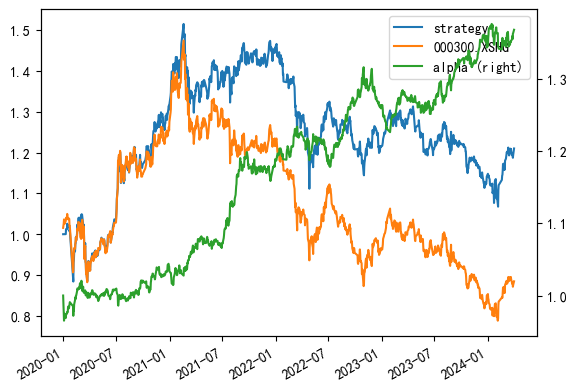

In [27]:
# 测试集合预测
x_test_copy = x_test.copy()
x_test_copy['predict'] = clf.predict(x_test_copy)
# 信号递延
predict_signal_cum,predict_signal_delay = get_siganl_delay(x_test_copy)

# 回测检验
buy_list = (predict_signal_cum != 0).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

##### 2.1.2 max_depth = 20

In [28]:
clf = DecisionTreeClassifier(criterion = 'gini',
                             class_weight = 'balanced',
                             max_depth = 20,
                             random_state = 0,
                             )

clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=0)

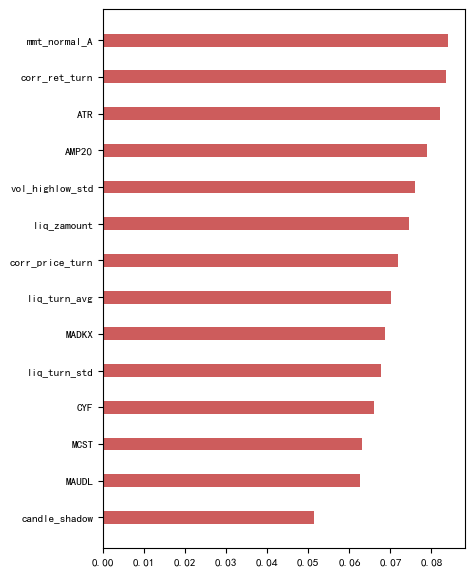

In [29]:
feature_importances(clf)

100%|██████████| 206/206 [00:00<00:00, 245.08it/s]


{'策略累计收益': 1.1805,
 '策略年化收益': 0.2101,
 '基准累计收益': -0.1155,
 '基准年化收益': -0.0296,
 '阿尔法': 0.217,
 '贝塔': 0.8866,
 '波动率': 0.1869,
 '夏普比率': 0.9639,
 '下行波动率': 0.1309,
 '索提诺比率': 1.3761,
 '跟踪误差': 0.06,
 '信息比率': 3.9971,
 '最大回撤': 0.1963,
 '卡玛比率': 1.0707,
 '超额累计收益': 1.4653,
 '超额年化收益': 0.247,
 '超额波动率': 0.0613,
 '超额夏普': 3.5393,
 '超额最大回测': 0.058,
 '胜率': 0.5899,
 '盈亏比': 1.2786}

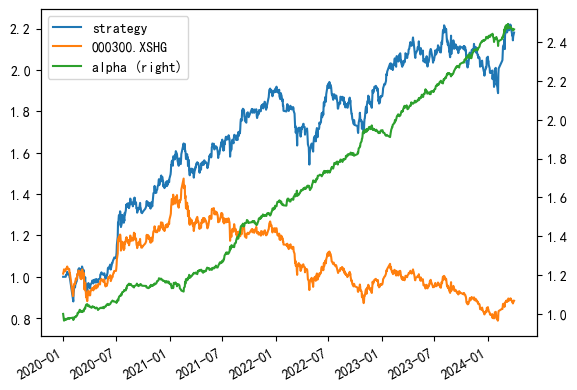

In [30]:
# 测试集合预测
x_test_copy = x_test.copy()
x_test_copy['predict'] = clf.predict(x_test_copy)
# 信号递延
predict_signal_cum,predict_signal_delay = get_siganl_delay(x_test_copy)

# 回测检验
buy_list = (predict_signal_cum != 0).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

#### 2.2 参数遍历

##### 2.2.1 for 循环编辑

In [31]:
# For遍历
# 基准指数
index_item = '000300.XSHG'
# 机器学习数据
data = pd.read_pickle('./data/ml_data.pkl')
# 研究周期
date_list = sorted(set(data.index.get_level_values(0)))                                    # 研究周期确定
# 特征集
x = data.loc[:,:'AMP20']                                                                   # 去除文本数据，保留因子数据
# 目标集合
y = data.loc[:,'target']                                                                   # Y对象为binary数据1，0
# 样本分离
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)         # 拆分训练集和测试集
# 特征名称
features = x_train.columns.tolist()                                                        # 建立特征集

record = {}
max_depth_performance = pd.DataFrame()
for i in tqdm(range(3,20,2)):
    clf = DecisionTreeClassifier(criterion = 'gini',
                             class_weight = 'balanced',
                             max_depth = i,
                             random_state = 0,
                             )

    clf.fit(x_train,y_train)

    # 测试集合预测
    x_test_copy = x_test.copy()
    x_test_copy['predict'] = clf.predict(x_test_copy)
    # 信号递延
    predict_signal_cum,predict_signal_delay = get_siganl_delay(x_test_copy)

    # 回测检验
    buy_list = (predict_signal_cum != 0).astype(int)
    df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
    account_result = backtest(df_wight,5)
    performance_cumnet,result = get_performance_analysis(account_result,index_item)
    # 存入累计表现
    max_depth_performance[i] = performance_cumnet['strategy']
    # 存入累计收益
    record[i] = result['策略累计收益']
max_depth_performance['000300.XSHG'] = performance_cumnet['000300.XSHG']

100%|██████████| 9/9 [01:56<00:00, 12.91s/it]


<Axes: >

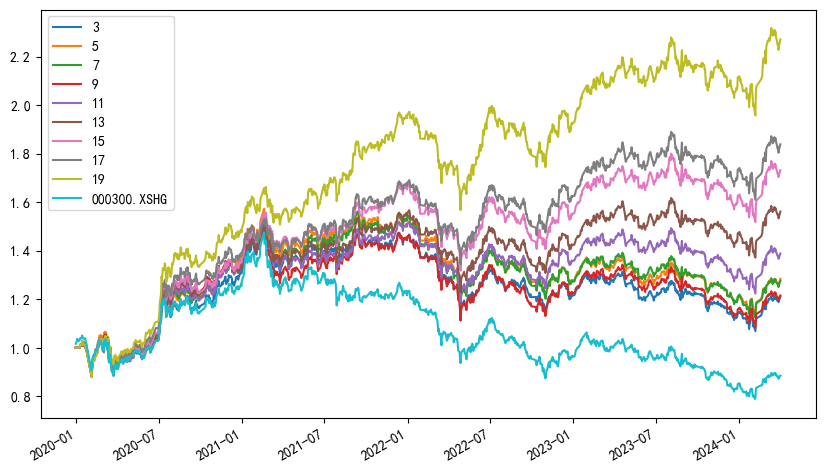

In [32]:
max_depth_performance.plot(figsize = (10,6))

<Axes: >

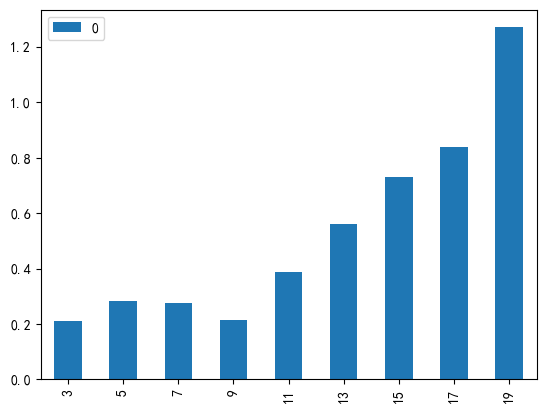

In [33]:
pd.DataFrame([record]).T.plot(kind = 'bar')

##### 2.2.2 网格搜索

In [34]:
from sklearn.model_selection import GridSearchCV

# 网格搜索法
dt_grid = {
           'max_depth':np.arange(3,20,3),
           'ccp_alpha':np.logspace(-5,-3,5)
           }

dt_gscv = GridSearchCV(DecisionTreeClassifier(criterion = 'gini',
                                              class_weight = 'balanced',
                                              random_state = 0),
                        param_grid = dt_grid,
                        scoring = 'precision',
                        cv = 5,
                        n_jobs = -2,
                        verbose = True)

dt_gscv.fit(x_train.iloc[:10000], y_train.iloc[:10000])
dt_tuned_score = dt_gscv.score(x_test, y_test)
dt_tuned_score

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.4479695431472081

In [35]:
best_clf = dt_gscv.best_estimator_
best_clf.fit(x_train,y_train)
best_clf

DecisionTreeClassifier(ccp_alpha=1e-05, class_weight='balanced', max_depth=18,
                       random_state=0)

100%|██████████| 206/206 [00:00<00:00, 229.46it/s]


{'策略累计收益': 1.1007,
 '策略年化收益': 0.1991,
 '基准累计收益': -0.1155,
 '基准年化收益': -0.0296,
 '阿尔法': 0.2081,
 '贝塔': 0.8893,
 '波动率': 0.1875,
 '夏普比率': 0.9022,
 '下行波动率': 0.1324,
 '索提诺比率': 1.2771,
 '跟踪误差': 0.06,
 '信息比率': 3.8109,
 '最大回撤': 0.214,
 '卡玛比率': 0.9305,
 '超额累计收益': 1.3752,
 '超额年化收益': 0.2357,
 '超额波动率': 0.0614,
 '超额夏普': 3.3507,
 '超额最大回测': 0.0569,
 '胜率': 0.5986,
 '盈亏比': 1.2164}

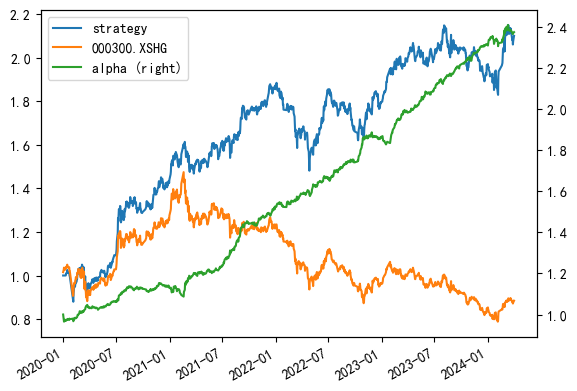

In [36]:
# 测试集合预测
x_test_copy = x_test.copy()
x_test_copy['predict'] = best_clf.predict(x_test_copy)
# 信号递延
predict_signal_cum,predict_signal_delay = get_siganl_delay(x_test_copy)

# 回测检验
buy_list = (predict_signal_cum != 0).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

### 4 数据中的未来函数问题


#### 4.1 滚动训练集划分

In [42]:
# 基准指数
index_item = '000300.XSHG'
# 机器学习数据
data = pd.read_pickle('./data/ml_data.pkl')
# 研究周期
date_list = sorted(set(data.index.get_level_values(0)))                                    # 研究周期确定
# 特征集
x = data.loc[:,:'AMP20']                                                                   # 去除文本数据，保留因子数据
# 目标集合
y = data.loc[:,'target']                                                                   # Y对象为binary数据1，0
# 样本分离
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)         # 拆分训练集和测试集
# 特征名称
features = x_train.columns.tolist()                                                        # 建立特征集

# 滚动训练时间点
re_train_days = date_list[480::60]

In [43]:
re_train_days

[Timestamp('2021-12-24 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-06-28 00:00:00'),
 Timestamp('2022-09-21 00:00:00'),
 Timestamp('2022-12-21 00:00:00'),
 Timestamp('2023-03-23 00:00:00'),
 Timestamp('2023-06-21 00:00:00'),
 Timestamp('2023-09-15 00:00:00'),
 Timestamp('2023-12-18 00:00:00'),
 Timestamp('2024-03-20 00:00:00')]

In [44]:
# 训练集 （收益空窗期）
T = 5
data_train = data.loc[:pd.to_datetime(get_previous_trading_date(re_train_days[0],T))]
# 测试集
data_test = data.loc[re_train_days[0]:re_train_days[1]]

#### 4.2 交叉验证算法修正

In [47]:
# 打标记号_5fold_交叉验证
date_len = sorted(set(data_train.index.get_level_values(0)))
# 空窗期 20 日
fold_length = (len(date_len) - 80)//5
label = ([1] * fold_length 
        + [0] * 20 
        + [2] * fold_length 
        + [0] * 20 
        + [3] * fold_length 
        + [0] * 20 
        + [4] * fold_length 
        + [0] * 20 
        + [5] * (len(date_len) - 80 - (fold_length * 4))
        )

In [49]:
for i,j in zip(date_len,label):
    data_train.loc[i,'label'] = j

#### 4.3 单期测试训练

In [51]:
def best_estimetor_DecisionTreeClassifier(data_train_input,fatcors):
    precision_postive_cv_clf = pd.DataFrame()
    for j in tqdm(range(5,10,2)):
        for t in np.logspace(-8,-5,4):
            clf=DecisionTreeClassifier(criterion='gini',
                                       max_depth=j,
                                       class_weight='balanced',
                                       ccp_alpha=t,
                                       random_state = 0)         #生成决策树
            precision_postive_cv = 0
            for i in range(1,6):
                data_train = data_train_input[data_train_input.label != i]
                data_validation = data_train_input[data_train_input.label == i]
                x_train = data_train.loc[:,fatcors]
                y_train = data_train.loc[:,'target']
                x_val = data_validation.loc[:,fatcors]
                y_val = data_validation.loc[:,'target']
                clf.fit(x_train,y_train)
                y_hat = clf.predict(x_val)                                          # 训练模型
                martrix = confusion_matrix(y_val, y_hat)
                metric = martrix[1,1] / martrix[:,1].sum()                          # 精确率 预测是涨结果真的涨了
                # metric = (martrix[1,1] + martrix[0,0]) / martrix.sum().sum()      # 准确率 预测是涨结果真的涨了
                precision_postive_cv += metric
            temp = pd.DataFrame([j,t,precision_postive_cv/5],index = ['max_depth','ccp_alpha','precision_postive_cv'])
            precision_postive_cv_clf = pd.concat([precision_postive_cv_clf,temp],axis = 1)
    return precision_postive_cv_clf

In [52]:
dt_result = best_estimetor_DecisionTreeClassifier(data_train,features)

100%|██████████| 3/3 [02:30<00:00, 50.15s/it]


In [53]:
dt_result

,0,0,0,0,0,0,0,0,0,0,0,0
max_depth,5.000000e+00,5.000000e+00,5.000000,5.000000,7.000000e+00,7.000000e+00,7.000000,7.000000,9.000000e+00,9.000000e+00,9.000000,9.000000
ccp_alpha,1.000000e-08,1.000000e-07,0.000001,0.000010,1.000000e-08,1.000000e-07,0.000001,0.000010,1.000000e-08,1.000000e-07,0.000001,0.000010
precision_postive_cv,4.441241e-01,4.441241e-01,0.444124,0.444124,4.419839e-01,4.419839e-01,0.441984,0.442002,4.354965e-01,4.354965e-01,0.435496,0.435509


In [54]:
best_estimator_param = dt_result.T.sort_values(by = 'precision_postive_cv',ascending = False).iloc[0].to_dict()
best_estimator_param

{'max_depth': 5.0,
 'ccp_alpha': 1e-08,
 'precision_postive_cv': 0.4441241368193459}

In [55]:
# 参数引入
clf = DecisionTreeClassifier(criterion='gini',max_depth=int(best_estimator_param['max_depth']),class_weight='balanced',ccp_alpha=best_estimator_param['ccp_alpha'],random_state = 0)

In [56]:
clf.fit(data_train.loc[:,features],data_train.loc[:,'target'])
y_hat = clf.predict(data_test.loc[:,features])
y_hat

array([ True, False, False, ..., False,  True, False])

In [57]:
data_test['predict'] = y_hat
data_test

liq_turn_avg  liq_turn_std  liq_zamount  \
date       order_book_id                                            
2021-12-24 000001.XSHE        0.469850      0.562676    -1.144696   
           000002.XSHE        0.616546      0.386012     0.278777   
           000063.XSHE        0.456313      0.016220     0.053321   
           000066.XSHE       -0.109937     -0.555261     0.838208   
           000069.XSHE       -0.100695      0.228294    -0.828096   
...                                ...           ...          ...   
2022-03-28 688363.XSHG        1.510131      1.326479     2.334179   
           688396.XSHG        1.915082      1.654491    -0.267672   
           688561.XSHG       -1.312160     -1.213216     0.372714   
           688599.XSHG        1.405054      0.769790     0.890086   
           688981.XSHG       -0.357600     -0.108707    -0.735454   

                          corr_price_turn  corr_ret_turn  vol_highlow_std  \
date       order_book_id                                                    
2021-12-24 000001.XSHE           0.500864      -0.495099         1.118723   
           000002.XSHE           0.170192       0.985332        -0.223661   
           000063.XSHE           1.652561       0.574268        -0.309739   
           000066.XSHE           0.937241      -0.319690        -1.308691   
           000069.XSHE           0.093113       0.470932        -0.580001   
...                                   ...            ...              ...   
2022-03-28 688363.XSHG          -0.813581       0.794654        -1.426735   
           688396.XSHG           1.303477       1.589948        -1.011453   
           688561.XSHG          -1.441939      -1.010254        -0.616863   
           688599.XSHG          -0.597793      -1.203249         1.892017   
           688981.XSHG           0.175554      -0.085842        -0.598259   

                          candle_shadow  mmt_normal_A      MCST       CYF  \
date       order_book_id                                                    
2021-12-24 000001.XSHE         0.335573     -0.471052  0.123470  0.484381   
           000002.XSHE         0.271989     -1.087844 -0.116875  0.593063   
           000063.XSHE        -0.638140      0.046773 -0.444941  0.591048   
           000066.XSHE        -0.961917     -0.784927 -0.692000 -0.169702   
           000069.XSHE        -0.007366      0.366880 -0.138285 -0.102219   
...                                 ...           ...       ...       ...   
2022-03-28 688363.XSHG         0.675942      0.034286  1.194128  1.466750   
           688396.XSHG        -0.415791      0.367804  1.335927  1.920558   
           688561.XSHG         1.272428     -0.711354  1.167280 -1.350233   
           688599.XSHG         1.104648      0.591046  0.813172  1.422967   
           688981.XSHG        -1.158569     -0.757439 -0.192583 -0.383960   

                               ATR     MADKX     MAUDL     AMP20    ret_5d  \
date       order_book_id                                                     
2021-12-24 000001.XSHE    0.147183  0.160067  0.154061  0.894494 -0.049049   
           000002.XSHE   -0.259542 -0.227978 -0.223136 -0.368017 -0.015159   
           000063.XSHE   -0.882184 -0.552831 -0.547613 -0.533946  0.050030   
           000066.XSHE   -1.189358 -1.173073 -1.176753 -1.724265  0.041698   
           000069.XSHE   -0.313162 -0.166850 -0.163706  0.427290  0.017515   
...                            ...       ...       ...       ...       ...   
2022-03-28 688363.XSHG    1.247520  1.337931  1.340869 -0.882660  0.045409   
           688396.XSHG    0.394182  0.504689  0.580549 -1.307877 -0.064748   
           688561.XSHG    1.162579  1.215817  1.150468  0.150374  0.030691   
           688599.XSHG    1.005012  0.697769  0.587595  1.891064 -0.152251   
           688981.XSHG   -1.364660 -0.518029 -0.561722 -0.953687 -0.018929   

                          excess_ret_5d  current_ret  target  predict  
date       order_book_id             

In [58]:
df_wight

order_book_id,000001.XSHE,000002.XSHE,000063.XSHE,000066.XSHE,000069.XSHE,000100.XSHE,000157.XSHE,000166.XSHE,000301.XSHE,000333.XSHE,...,688187.XSHG,688223.XSHG,688256.XSHG,688271.XSHG,688303.XSHG,688363.XSHG,688396.XSHG,688561.XSHG,688599.XSHG,688981.XSHG
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


100%|██████████| 12/12 [00:00<00:00, 241.05it/s]


{'策略累计收益': -0.1146,
 '策略年化收益': -0.3902,
 '基准累计收益': -0.1616,
 '基准年化收益': -0.5115,
 '阿尔法': -0.1242,
 '贝塔': 0.5435,
 '波动率': 0.1151,
 '夏普比率': -3.6499,
 '下行波动率': 0.0861,
 '索提诺比率': -4.8825,
 '跟踪误差': 0.1002,
 '信息比率': 1.2109,
 '最大回撤': 0.1276,
 '卡玛比率': -3.0566,
 '超额累计收益': 0.0561,
 '超额年化收益': 0.2483,
 '超额波动率': 0.1,
 '超额夏普': 2.1822,
 '超额最大回测': 0.0256,
 '胜率': 0.5574,
 '盈亏比': 1.1773}

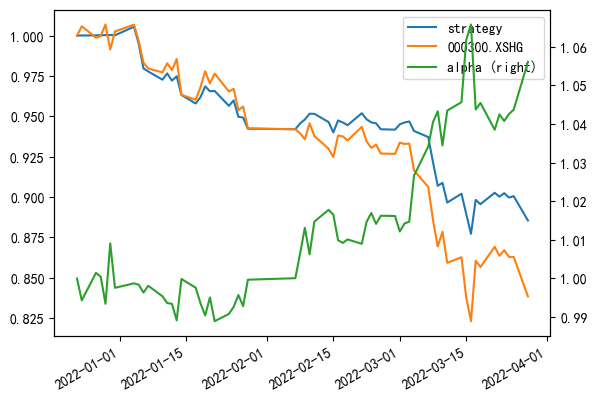

In [59]:
# 信号递延
predict_signal_cum,predict_signal_delay = get_siganl_delay(data_test)

# 回测检验
buy_list = (predict_signal_cum != 0).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

#### 4.4 滚动训练

In [60]:
pre_gap = 240 * 2        # 预计算
ret_gap = 5              # 预测收益
predict_gap = 60         # 预测长度

# 滚动周期
trade_days = sorted(list(set(data.index.get_level_values(0).tolist())))
re_train_days = trade_days[pre_gap::predict_gap]

In [61]:
data_test_total = pd.DataFrame()
paramter_dt_reccord = {}
for i in tqdm(re_train_days[-5:]):            # 测试5期
    # 训练开始/结束时间
    train_start = pd.Timestamp(get_previous_trading_date(i,(pre_gap + ret_gap)))
    train_end = pd.Timestamp(get_previous_trading_date(i,ret_gap))
    # 测试开始/结束时间
    test_start = i
    test_end = pd.Timestamp(get_next_trading_date(i,predict_gap - 1))
    # 训练集数据
    data_train = data.loc[train_start:train_end]
    data_train_x = data_train.loc[:,features]
    data_train_y = data_train.loc[:,'target']
    # 测试集数据
    data_test = data.loc[test_start:test_end]
    data_test_x = data_test.loc[:,features]
    
    # 打标记号_5fold_交叉验证
    date_len = sorted(set(data_train.index.get_level_values(0)))
    fold_length = (len(date_len) - 80)//5
    label = ([1] * fold_length 
            + [0] * 20 
            + [2] * fold_length 
            + [0] * 20 
            + [3] * fold_length 
            + [0] * 20 
            + [4] * fold_length 
            + [0] * 20 
            + [5] * (len(date_len) - 80 - (fold_length * 4))
            )
    for i,j in zip(date_len,label):
        data_train.loc[i,'label'] = j
    
    # 模型训练
    paramter_dt = best_estimetor_DecisionTreeClassifier(data_train,features).T.sort_values(by ='precision_postive_cv',ascending = False).iloc[0].to_dict()
    print(i,paramter_dt)
    # 模型输出
    clf = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = int(best_estimator_param['max_depth']),
                                 class_weight = 'balanced',
                                 ccp_alpha = best_estimator_param['ccp_alpha'],
                                 random_state = 0)

    # 预测结果输出
    y_hat = clf.fit(data_train_x,data_train_y).predict(data_test_x)
    data_test['predict'] = y_hat
    data_test_total = pd.concat([data_test_total,data_test[['predict']]],axis = 0)


create_dir_not_exist('./data')
data_test_total.to_pickle('./data/data_test_total_dt_all.pkl')

100%|██████████| 3/3 [02:30<00:00, 50.27s/it]


2023-03-16 00:00:00 {'max_depth': 7.0, 'ccp_alpha': 1e-08, 'precision_postive_cv': 0.4324342908098492}


100%|██████████| 3/3 [02:31<00:00, 50.48s/it]]


2023-06-14 00:00:00 {'max_depth': 9.0, 'ccp_alpha': 1e-08, 'precision_postive_cv': 0.44175771244363543}


100%|██████████| 3/3 [02:28<00:00, 49.42s/it]]


2023-09-08 00:00:00 {'max_depth': 5.0, 'ccp_alpha': 1e-05, 'precision_postive_cv': 0.4817258259655638}


100%|██████████| 3/3 [02:27<00:00, 49.29s/it]]


2023-12-11 00:00:00 {'max_depth': 5.0, 'ccp_alpha': 1e-08, 'precision_postive_cv': 0.4797365713915053}


100%|██████████| 3/3 [02:28<00:00, 49.54s/it]]


2024-03-13 00:00:00 {'max_depth': 5.0, 'ccp_alpha': 1e-08, 'precision_postive_cv': 0.4960094865209669}


100%|██████████| 5/5 [12:39<00:00, 151.85s/it]


100%|██████████| 50/50 [00:00<00:00, 221.59it/s]


{'策略累计收益': 0.0208,
 '策略年化收益': 0.0209,
 '基准累计收益': -0.1004,
 '基准年化收益': -0.1012,
 '阿尔法': 0.0782,
 '贝塔': 0.6029,
 '波动率': 0.1097,
 '夏普比率': -0.0827,
 '下行波动率': 0.0651,
 '索提诺比率': -0.1395,
 '跟踪误差': 0.08,
 '信息比率': 1.527,
 '最大回撤': 0.1127,
 '卡玛比率': 0.1857,
 '超额累计收益': 0.1347,
 '超额年化收益': 0.1359,
 '超额波动率': 0.0802,
 '超额夏普': 1.3199,
 '超额最大回测': 0.0438,
 '胜率': 0.6064,
 '盈亏比': 0.8743}

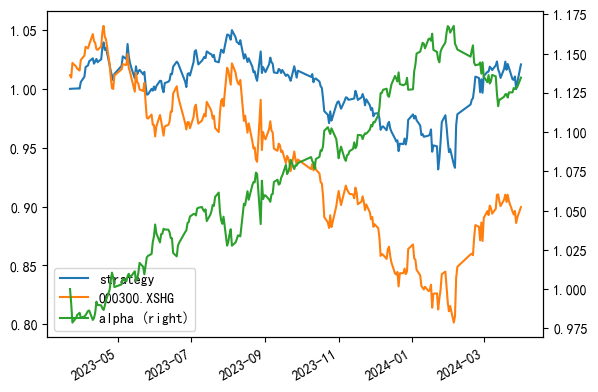

In [65]:
# 信号递延
predict_signal_cum,predict_signal_delay = get_siganl_delay(data_test_total)
# 回测检验
buy_list = (predict_signal_cum != 0).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result

100%|██████████| 50/50 [00:00<00:00, 174.30it/s]


{'策略累计收益': 0.0373,
 '策略年化收益': 0.0376,
 '基准累计收益': -0.1004,
 '基准年化收益': -0.1012,
 '阿尔法': 0.0988,
 '贝塔': 0.6316,
 '波动率': 0.1135,
 '夏普比率': 0.0669,
 '下行波动率': 0.0656,
 '索提诺比率': 0.1157,
 '跟踪误差': 0.0753,
 '信息比率': 1.8426,
 '最大回撤': 0.1133,
 '卡玛比率': 0.3317,
 '超额累计收益': 0.1531,
 '超额年化收益': 0.1544,
 '超额波动率': 0.0757,
 '超额夏普': 1.6446,
 '超额最大回测': 0.036,
 '胜率': 0.6064,
 '盈亏比': 0.9156}

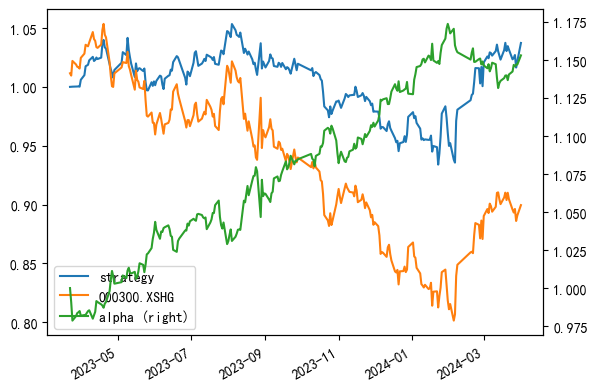

In [66]:
# 回测检验
buy_list = (predict_signal_cum > 1).astype(int)
df_wight = buy_list.div(buy_list.sum(axis = 1),axis = 0).replace(0,np.nan)
account_result = backtest(df_wight,5)
performance_cumnet,result = get_performance_analysis(account_result,index_item)
performance_cumnet.plot(secondary_y='alpha')
result